# precious-metals-etfs
Mod 3 Project for FIS DC DS 08292019


### Collaborators:
- *Anastasia Kharina*
- *Jalal Kiani*
- *Alyssa Liguori*


### Goals:
Generate insights about precious metal ETFs to guide investment decisions.


### Data Source
The dataset used in this project is obtained via [Alpha Vantage API](https://www.alphavantage.co/documentation/), using symbols: SLV, SIL, GLD, GDX, and  DJI


In [1]:
#import the required libraries
%load_ext autoreload
%autoreload 2 
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt
import json
import seaborn as sns
from data_compilation import call_all_symbols
from data_cleaning import full_clean
from visualizations import *
from volatility import *
from hypothesis_tests import *

In [2]:
symbol_list = ['SLV', 'SIL', 'GLD', 'GDX', 'DJI']

In [3]:
#Getting the data
df = call_all_symbols(symbol_list)
df.tail()

In [4]:
#Cleaning data
df_clean = full_clean()

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


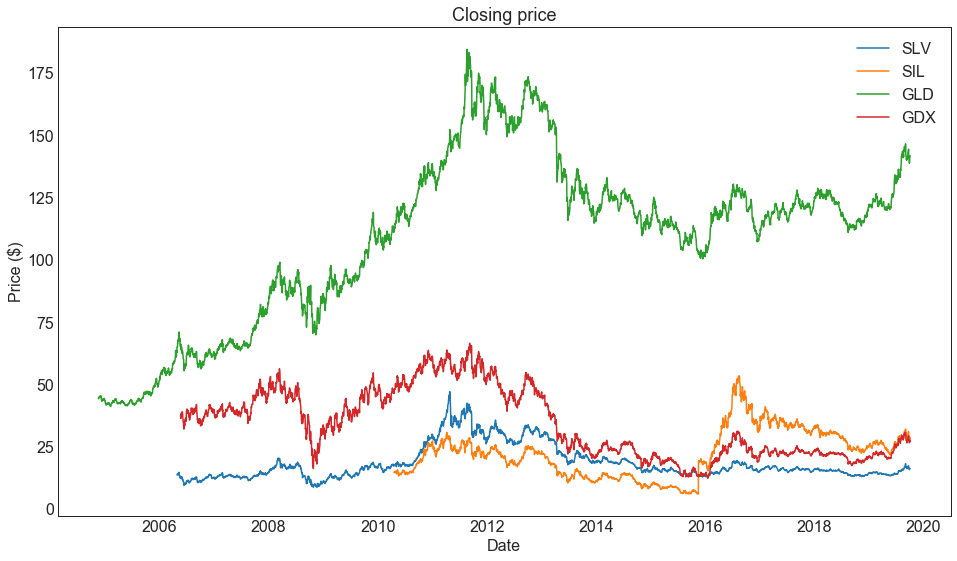

In [5]:
#make a plot from the observations
symbols = ['SLV', 'SIL', 'GLD','GDX']
visualizations_four(df_clean.copy(), symbols,
               type_price = 'close',
               start_date = '2000-01-01', 
               end_date = '2019-10-04', 
               fill_na = 'ffill',
               moving_average_plot = False,
               short_window = 20,
               long_window = 100)

# Volatility per month

This function compute the average volatility for each month. Then, it ranks the months based on their average volatility and return a boxplot based on the averge ranking.

"Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security."

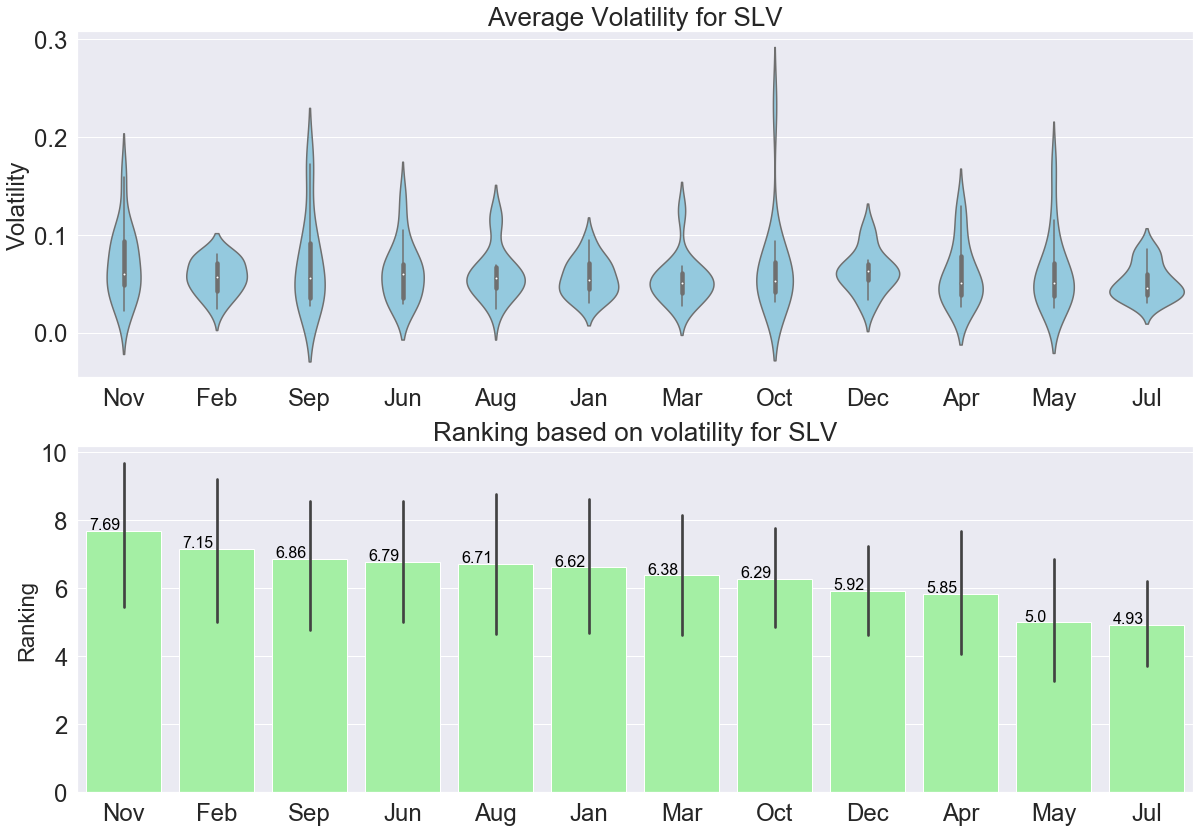

In [6]:
target_var = 'close'
target_symbol = 'SLV'
volability_period = 'M'
plot_option = True
n_bootstrap = 1000
if volability_period == 'Q':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_quarter'
elif volability_period == 'M':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_month'
    
volatility_set = compute_volatility(df_clean.copy(), target_var, target_symbol, volability_period)
monthly_vol_df, VOL_ranking_df = volatility_set
visualization_one(volatility_set, target_symbol, target_var, output_image_name)

# Hypothesis #1 part 1

The above figure shows that Over the past 13 years, November has been the most volatile month 
on average for the SLV stock and July is the least volatile. The question
is whether this is a persistent signal or just noise in the data?

The goal of this function, here, is to statiscally analyze and test
this phenomena to check whether is statistically significant or not.

$H_0$ : There is no monthly seasonality 

$H_A$ : There is monthly seasonality

Based on the p value of 0.59 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Apr
----------------------------------------------------------------------------------------------------
Based on the p value of 0.67 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Aug
----------------------------------------------------------------------------------------------------
Based on the p value of 0.64 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Dec
----------------------------------------------------------------------------------------------------
Based on the p value of 0.37 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, w

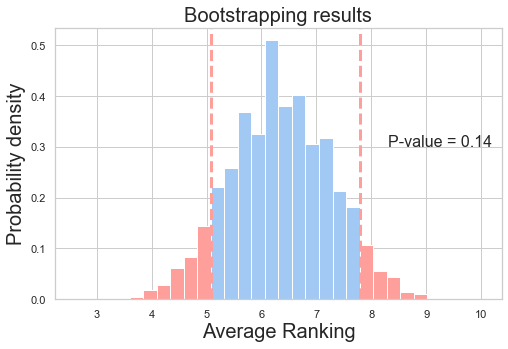

In [7]:
P_values = hypothesis_test_one(0.05, VOL_ranking_df, df_clean, 
                               target_var, target_symbol,volability_period,
                               n_bootstrap, plot_option, 'Nov')

# Volatility per quarter

This function compute the average volatility for each quarter. 
Then, it ranks the quarters based on their average volatility and return a boxplot based on the averge ranking.

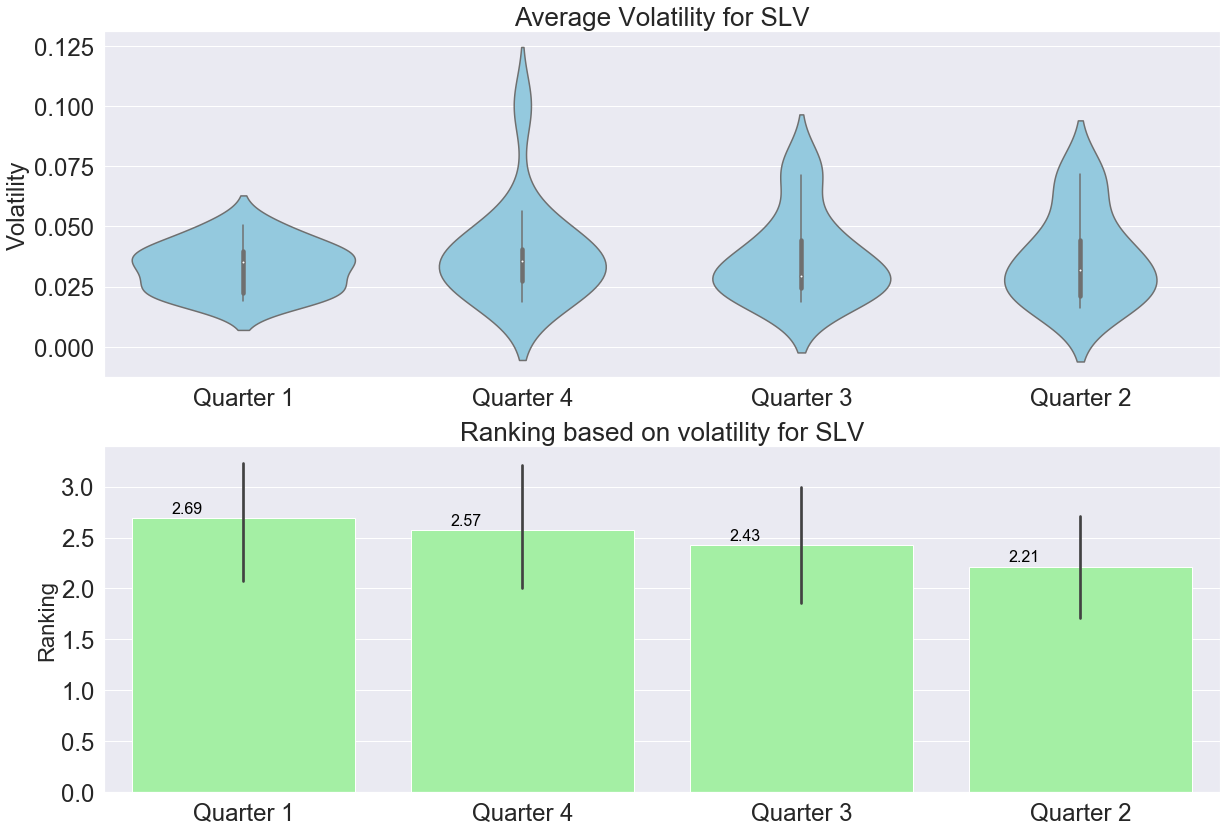

In [8]:
target_var = 'close'
target_symbol = 'SLV'
volability_period = 'Q'
plot_option = True
n_bootstrap = 10000
if volability_period == 'Q':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_quarter'
elif volability_period == 'M':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_month'
    
volatility_set = compute_volatility(df_clean.copy(), target_var, target_symbol, volability_period)
monthly_vol_df, VOL_ranking_df = volatility_set
visualization_one(volatility_set, target_symbol, target_var, output_image_name)

# Hypothesis #1 part 2

The above figure shows that Over the past 13 years, Qauarter 1 has been the most volatile qauarter 
on average for the SLV stock and Qauarter 2 is the least volatile qauarter. The question
is whether this is a persistent signal or just noise in the data?

The goal of this function, here, is to statiscally analyze and test
this phenomena to check whether is statistically significant or not.

$H_0$ : There is no seasonality 

$H_A$ : There is monthly seasonality

Based on the p value of 0.46 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Quarter 1
----------------------------------------------------------------------------------------------------
Based on the p value of 0.33 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Quarter 2
----------------------------------------------------------------------------------------------------
Based on the p value of 0.81 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Quarter 3
----------------------------------------------------------------------------------------------------
Based on the p value of 0.67 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due t

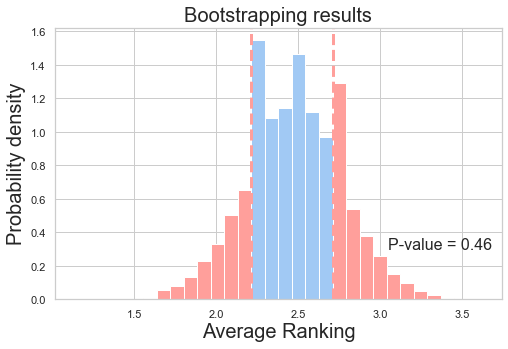

In [9]:
P_values = hypothesis_test_one(0.05, VOL_ranking_df, df_clean, 
                               target_var, target_symbol,volability_period,
                               n_bootstrap, plot_option, 'Quarter 1')

# Hypothesis #3 : Comparing short-term investment of SLV and GLD

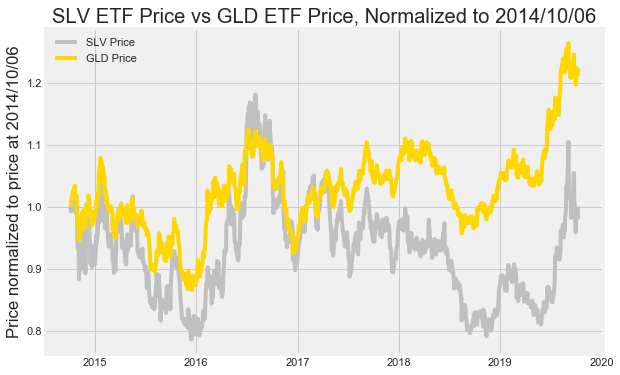

In [10]:
visualization_SLV_vs_GLD_5yrs(df_clean, date='2014-10-06')

From the above graph, 

### Comparing daily movements : SLV vs GLD
#### $H{0}$: daily_movement_SLV - daily_movement_GLD = 0
#### $H{a}$: daily_movement_SLV - daily_movement_GLD > 0

In [11]:
#Prepare dataset
a_day,b_day = hypothesis_test_three_prep(df_clean, type = 'day')

NormaltestResult(statistic=190.0606287006607, pvalue=5.356225640128341e-42)


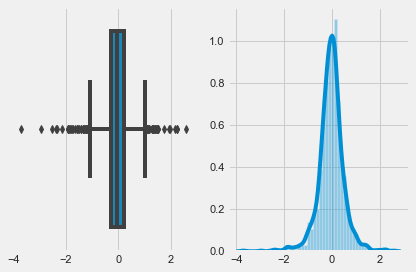

In [12]:
#Check for normality

day_movement_diff = a_day-b_day
print(stats.normaltest(day_movement_diff))
fig,ax = plt.subplots(1,2, tight_layout=True)
sns.boxplot(day_movement_diff,ax=ax[0])
sns.distplot(day_movement_diff,ax=ax[1]);

In [13]:
#Perform paired t-test
hypothesis_test_three_pttest(a_day,b_day)

t_val = -2.3432714494717457, p_val = 0.0192703027039268
Based on the p value of 0.0192703027039268 and our alpha of 0.05 we reject  the null hypothesis.
Due to these results, we  can state that there is a difference between daily movement of SLV and GLD
with an effect size, cohen's d, of -0.0494255877745543.


'Reject'

## Looking at weekly movement: SLV vs GLD

### $𝐻{0} $ : weekly movement SLV  - weekly movement  GLD = 0 
### $𝐻{a} $ : weekly movement SLV  - weekly movement GLD > 0 

In [14]:
#Prepare dataset
a_wk,b_wk = hypothesis_test_three_prep(df_clean, type = 'week')

NormaltestResult(statistic=9.4450106702574, pvalue=0.008892870994061481)


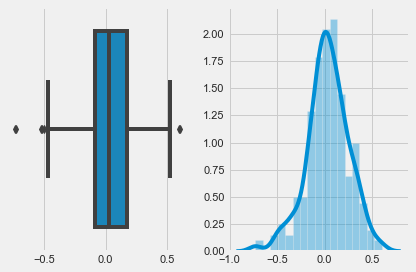

In [16]:
#Check for normality
week_movement_diff = a_wk-b_wk
print(stats.normaltest(week_movement_diff))
fig,ax = plt.subplots(1,2, tight_layout=True)
sns.boxplot(week_movement_diff,ax=ax[0])
sns.distplot(week_movement_diff,ax=ax[1]);

In [17]:
#Perform paired t-test
hypothesis_test_three_pttest(a_wk,b_wk)

t_val = 2.4144751312390587, p_val = 0.016459800388389515
Based on the p value of 0.016459800388389515 and our alpha of 0.05 we reject  the null hypothesis.
Due to these results, we  can state that there is a difference between daily movement of SLV and GLD
with an effect size, cohen's d, of 0.11929909883854352.


'Reject'

## Looking at monthly movement : SLV vs GLD

### $𝐻{0} $ : monthly movement SLV  - monthly movement  GLD = 0 
### $𝐻{a} $ : monthly movement SLV  - monthly movement GLD > 0 

In [18]:
#Prepare dataset
a_mo,b_mo = hypothesis_test_three_prep(df_clean, type = 'month')

NormaltestResult(statistic=0.9583309490860537, pvalue=0.6192999978294123)


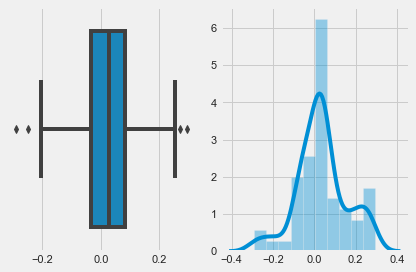

In [19]:
#Check for normality
mo_movement_diff = a_mo-b_mo
print(stats.normaltest(mo_movement_diff))
fig,ax = plt.subplots(1,2, tight_layout=True)
sns.boxplot(mo_movement_diff,ax=ax[0])
sns.distplot(mo_movement_diff,ax=ax[1]);

In [21]:
#Perform paired t-test
hypothesis_test_three_pttest(a_mo,b_mo)

t_val = 2.173509647042955, p_val = 0.03376750823886032
Based on the p value of 0.03376750823886032 and our alpha of 0.05 we reject  the null hypothesis.
Due to these results, we  can state that there is a difference between daily movement of SLV and GLD
with an effect size, cohen's d, of 0.21185180487594205.


'Reject'